In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from config import weather_api_key
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime
import requests

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1300)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1300)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

531

In [6]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass    


# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lebu
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | gari
Processing Record 5 of Set 1 | aksarka
Processing Record 6 of Set 1 | iguape
Processing Record 7 of Set 1 | katsuura
Processing Record 8 of Set 1 | razdolinsk
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | georgetown
Processing Record 11 of Set 1 | muyezerskiy
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | benguela
Processing Record 15 of Set 1 | bairiki
Processing Record 16 of Set 1 | victoria
Processing Record 17 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 18 of Set 1 | banda aceh
Processing Record 19 of Set 1 | saleaula
City not found. Skipping...
Processing Record 20 of Set 1 | port elizabeth
Processing Record 21 of Set 1 | taolanaro
City not found. Sk

Processing Record 37 of Set 4 | east london
Processing Record 38 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 39 of Set 4 | rio grande
Processing Record 40 of Set 4 | avarua
Processing Record 41 of Set 4 | sidney
Processing Record 42 of Set 4 | saldanha
Processing Record 43 of Set 4 | la ronge
Processing Record 44 of Set 4 | sola
Processing Record 45 of Set 4 | matara
Processing Record 46 of Set 4 | naze
Processing Record 47 of Set 4 | grindavik
Processing Record 48 of Set 4 | aklavik
Processing Record 49 of Set 4 | poum
Processing Record 50 of Set 4 | lompoc
Processing Record 1 of Set 5 | ondorhaan
City not found. Skipping...
Processing Record 2 of Set 5 | jamestown
Processing Record 3 of Set 5 | ferme-neuve
Processing Record 4 of Set 5 | nabire
Processing Record 5 of Set 5 | nguru
Processing Record 6 of Set 5 | tchibanga
Processing Record 7 of Set 5 | qaqortoq
Processing Record 8 of Set 5 | ouadda
Processing Record 9 of Set 5 | ponta do sol
Processing Record 10 o

Processing Record 29 of Set 8 | serebryansk
Processing Record 30 of Set 8 | san francisco
Processing Record 31 of Set 8 | maria aurora
Processing Record 32 of Set 8 | brigantine
Processing Record 33 of Set 8 | cherskiy
Processing Record 34 of Set 8 | deputatskiy
Processing Record 35 of Set 8 | bacuit
City not found. Skipping...
Processing Record 36 of Set 8 | araouane
Processing Record 37 of Set 8 | constitucion
Processing Record 38 of Set 8 | gazanjyk
Processing Record 39 of Set 8 | dolores
Processing Record 40 of Set 8 | dzaoudzi
Processing Record 41 of Set 8 | iqaluit
Processing Record 42 of Set 8 | kruisfontein
Processing Record 43 of Set 8 | ostrovnoy
Processing Record 44 of Set 8 | nome
Processing Record 45 of Set 8 | punta de bombon
Processing Record 46 of Set 8 | minab
Processing Record 47 of Set 8 | constantine
Processing Record 48 of Set 8 | port lincoln
Processing Record 49 of Set 8 | mecca
Processing Record 50 of Set 8 | murgab
Processing Record 1 of Set 9 | dingle
Processi

In [7]:
#convert array of dictionaries to Pandas DF
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lebu,-37.6167,-73.6500,56.98,86,0,17.87,CL,2022-12-31 03:24:01
1,Mataura,-46.1927,168.8643,70.39,39,89,5.12,NZ,2022-12-31 03:24:01
2,Rikitea,-23.1203,-134.9692,78.37,68,90,5.01,PF,2022-12-31 03:24:01
3,Gari,59.4307,62.3497,-12.50,100,98,3.87,RU,2022-12-31 03:24:02
4,Aksarka,66.5606,67.7975,-28.97,100,23,3.60,RU,2022-12-31 03:24:03
5,Iguape,-24.7081,-47.5553,70.29,88,2,5.53,BR,2022-12-31 03:24:06
6,Katsuura,35.1333,140.3000,49.60,51,100,4.63,JP,2022-12-31 03:24:07
7,Razdolinsk,58.4211,94.6658,-24.18,95,100,5.17,RU,2022-12-31 03:24:07
8,New Norfolk,-42.7826,147.0587,81.88,38,19,3.00,AU,2022-12-31 03:24:08
9,Georgetown,5.4112,100.3354,84.13,69,20,9.22,MY,2022-12-31 03:23:00


In [8]:
#reordering DF columns
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lebu,CL,2022-12-31 03:24:01,-37.6167,-73.6500,56.98,86,0,17.87
1,Mataura,NZ,2022-12-31 03:24:01,-46.1927,168.8643,70.39,39,89,5.12
2,Rikitea,PF,2022-12-31 03:24:01,-23.1203,-134.9692,78.37,68,90,5.01
3,Gari,RU,2022-12-31 03:24:02,59.4307,62.3497,-12.50,100,98,3.87
4,Aksarka,RU,2022-12-31 03:24:03,66.5606,67.7975,-28.97,100,23,3.60
5,Iguape,BR,2022-12-31 03:24:06,-24.7081,-47.5553,70.29,88,2,5.53
6,Katsuura,JP,2022-12-31 03:24:07,35.1333,140.3000,49.60,51,100,4.63
7,Razdolinsk,RU,2022-12-31 03:24:07,58.4211,94.6658,-24.18,95,100,5.17
8,New Norfolk,AU,2022-12-31 03:24:08,-42.7826,147.0587,81.88,38,19,3.00
9,Georgetown,MY,2022-12-31 03:23:00,5.4112,100.3354,84.13,69,20,9.22


In [9]:
#creating an output CSV
output_data_file = 'weather_data/cities.csv'
#export city_data into CSV
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

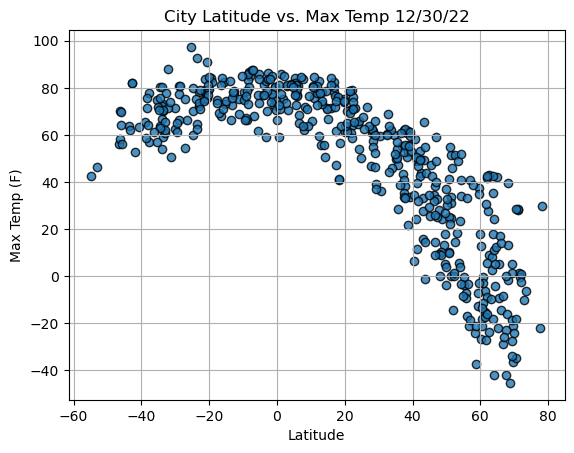

In [11]:
#import time
import time

#build scatter plot for lat vs. max temp
plt.scatter(lats, 
            max_temps,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

#incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temp "+ time.strftime('%x'))
plt.ylabel('Max Temp (F)')
plt.xlabel('Latitude')
plt.grid(True)

#save figure
plt.savefig('weather_data/Fig1.png')

#show plot
plt.show()

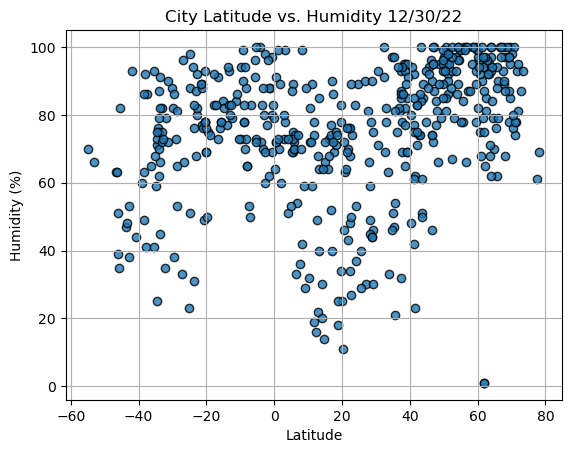

In [12]:
#import time
import time

#build scatter plot for lat vs. humidity
plt.scatter(lats, 
            humidity,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

#incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

#save figure
plt.savefig('weather_data/Fig2.png')

#show plot
plt.show()

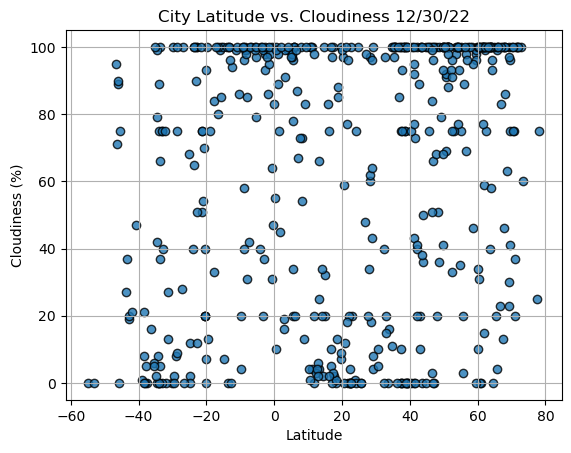

In [13]:
#import time
import time

#build scatter plot for lat vs. cloudiness
plt.scatter(lats, 
            cloudiness,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

#incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

#save figure
plt.savefig('weather_data/Fig3.png')

#show plot
plt.show()

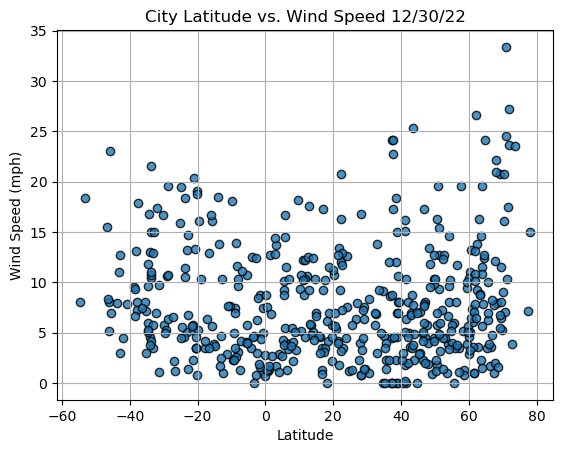

In [15]:
#import time
import time

#build scatter plot for lat vs. max temp
plt.scatter(lats, 
            wind_speed,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

#incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

#save figure
plt.savefig('weather_data/Fig4.png')

#show plot
plt.show()

In [17]:
# Import linregress
from scipy.stats import linregress
#create a function to create linear regression on the weather data and plot a regression line and the equation with data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    #run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    #calculate the regression line 'y values' from the slope and intercept
    regress_values = x_values * slope + intercept
    #get the equation of the line
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    #create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    #annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
#create northern & southern hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

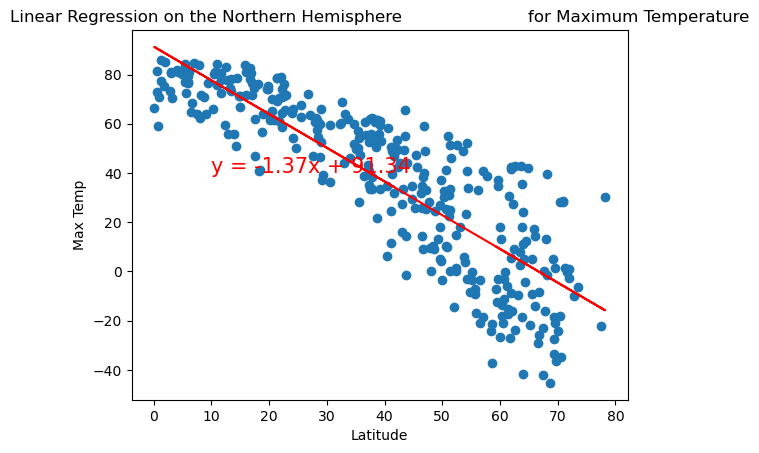

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for Maximum Temperature', 'Max Temp',(10,40))

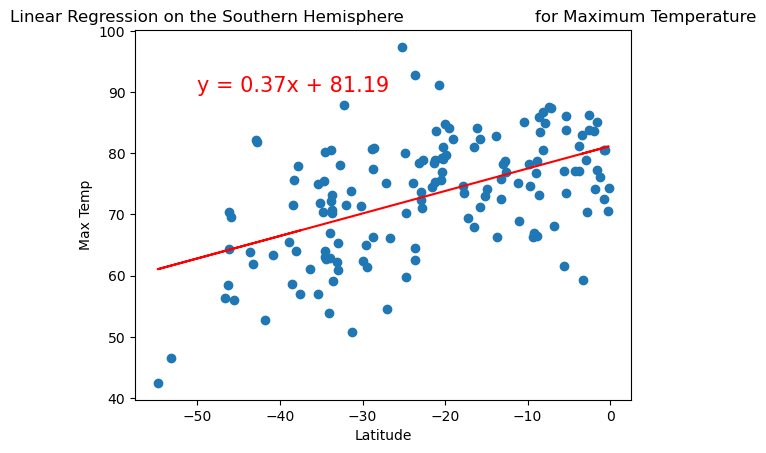

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

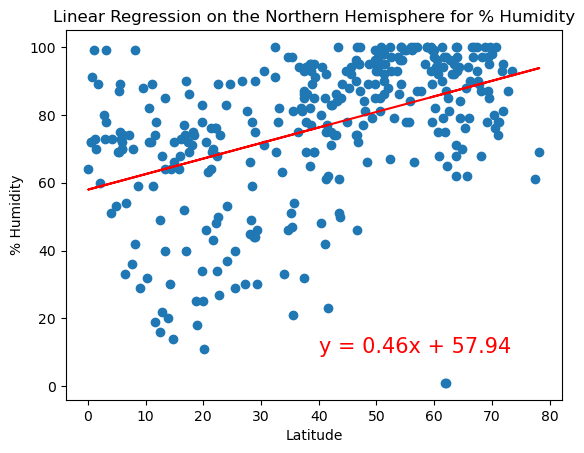

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

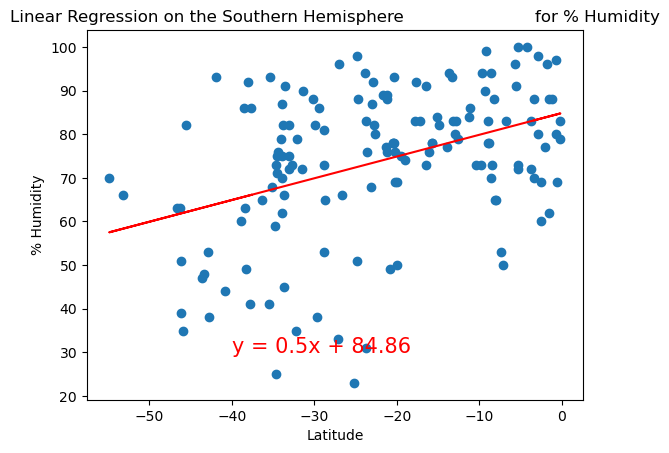

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-40,30))

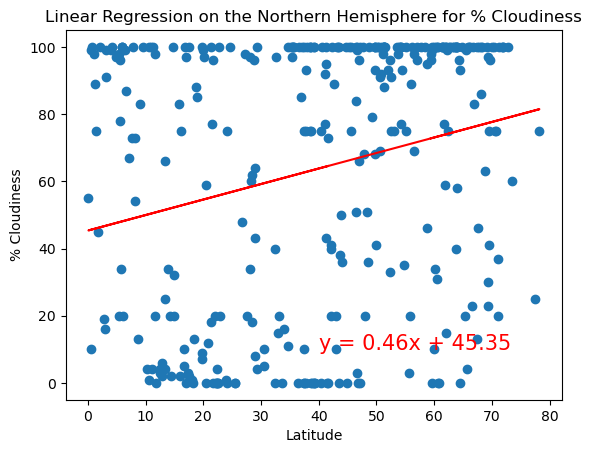

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

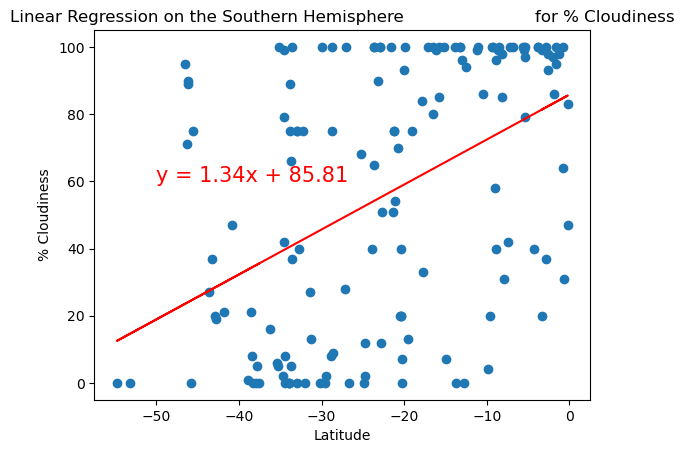

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

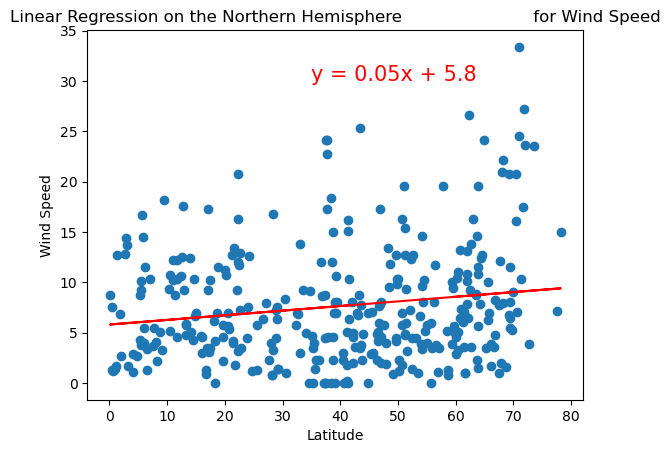

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(35,30))

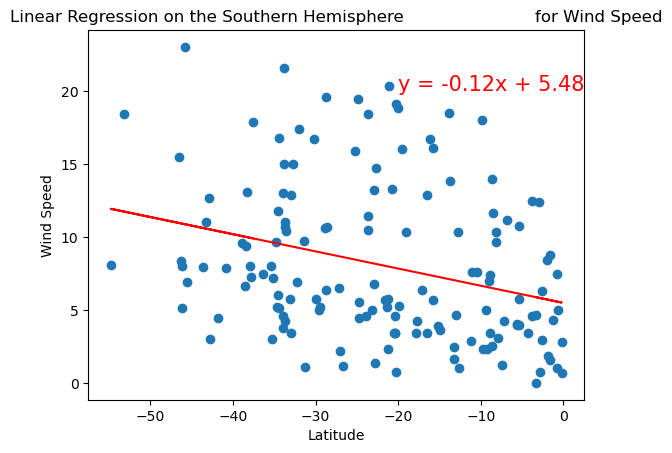

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-20,20))